In [1]:
# ignore console warnings
import warnings
warnings.filterwarnings('ignore')


# Assignment 1

## Instructions

## 1. [20 pts] Define each of the following machine learning terms in your own words

i. the training dataset, testing dataset, and validation dataset

- Training dataset: The subset of data we use to fit the model. It allows the model to learn patterns so it can generalize to unseen data.

- Testing dataset: A held-out set of data that is not used in training. It provides an unbiased estimate of how well the model performs on truly unseen data.

- Validation dataset: A separate portion of the data used during model development to tune hyperparameters, select the best model, and prevent overfitting before testing.

ii. ground truth, label

- Ground truth: The true class or value in the dataset, usually annotated by humans or measured directly. For example, the digit “5” written in an image.

- Label: The target output associated with an input. In supervised learning, this is what the model is trying to predict. (Ground truth = correct label, but once the model predicts, “label” often refers to either the true label or the predicted label depending on context.)

iii. pre-processing, feature, numerical, nominal

- Pre-processing: The data cleaning and transformation stage before training a model. This can include handling missing values, removing outliers, normalizing or standardizing features, and encoding categorical variables.

- Feature: An input variable that describes some aspect of the data. For example, in the Iris dataset, “petal length” is a feature.

- Numerical feature: A feature represented with numbers where mathematical operations make sense such as height, age, temperature, etc.

- Nominal feature: A categorical feature where the values are discrete and unordered like if we had color = red, green, blue.

iv. decision surface

- A boundary that a model learns to separate different classes. It shows where the model is equally likely to assign a point to one class or another. For linear models this is a straight line, while for non-linear models it may be complex and curved.

v. model validation, accuracy, cross-validation

- Model validation: The process of assessing a trained model’s performance on unseen data to ensure it generalizes well, not just memorizes the training data.

- Accuracy: A metric that measures the proportion of correctly predicted instances out of all predictions.

- Cross-validation: A resampling method where the dataset is split into multiple folds. The model is trained on some folds and validated on the remaining fold(s), repeated several times, to get a more reliable estimate of performance.

vi. parameters, hyperparameters, overfit

- Parameters: The internal values learned by the model during training (e.g., the weights and biases in a neural network, coefficients in linear regression).

- Hyperparameters: The external settings chosen before training that control the learning process. Such as: learning rate, number of layers, etc.

- Overfit: When a model learns the training data too closely, performing well on training data but poorly on unseen test data due to poor generalization.

vii. reclassification

- Reclassification refers to the process of taking model outputs and adjusting or re-mapping them into new categories or classes. For example, after an initial classification task, reclassification may be used to group predicted classes into broader categories, or to correct/improve predictions by applying additional rules.

--

## 2. [12 pts] Pick the Iris dataset of the Scikit-learn datasets for classification  

The dataset can be loaded with `datasets.load_`. Find out the following:

i. the number of data points  
ii. the number of features and their types  
iii. the number and name of categories (i.e. the target field)  
iv. the mean (or mode if nominal) of the first two features  

In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np

def print_dataset_info(dataset):
    print('(number of data points, features in the dataset)')
    print(dataset.data.shape)

    print("\nfeatures and their types:")
    for i, feature in enumerate(dataset.feature_names):
        print(f" - feature {feature} type: {dataset.data[0][i].dtype}")

    print("\nnumber and name of categories:")
    print(dataset.target_names)

    print("\nmean of the first two features:")
    first_two_features = dataset.data[:, :2]
    mean_first_two_features = np.mean(first_two_features, axis=0)
    print(mean_first_two_features)

In [3]:
# import and examine iris dataset
iris = sklearn.datasets.load_iris()
print_dataset_info(iris)

(number of data points, features in the dataset)
(150, 4)

features and their types:
 - feature sepal length (cm) type: float64
 - feature sepal width (cm) type: float64
 - feature petal length (cm) type: float64
 - feature petal width (cm) type: float64

number and name of categories:
['setosa' 'versicolor' 'virginica']

mean of the first two features:
[5.84333333 3.05733333]


## 3. [8 pts] Explore the Wine dataset  

Load it and find out the same characteristics as in **2.i–iv**.

In [4]:
#load wine dataset
wine = sklearn.datasets.load_wine()
print_dataset_info(wine)

(number of data points, features in the dataset)
(178, 13)

features and their types:
 - feature alcohol type: float64
 - feature malic_acid type: float64
 - feature ash type: float64
 - feature alcalinity_of_ash type: float64
 - feature magnesium type: float64
 - feature total_phenols type: float64
 - feature flavanoids type: float64
 - feature nonflavanoid_phenols type: float64
 - feature proanthocyanins type: float64
 - feature color_intensity type: float64
 - feature hue type: float64
 - feature od280/od315_of_diluted_wines type: float64
 - feature proline type: float64

number and name of categories:
['class_0' 'class_1' 'class_2']

mean of the first two features:
[13.00061798  2.33634831]


-

## 4. [20 pts] Visualizing feature pairs from the Iris dataset  

* From the plots, which feature(s) show the most promising separation power for machine learning?

- From looking at my plots below, for the iris dataset it seems the pedal width and pedal length have the best separation power.

* Now plot the features of the Wine dataset (from question 2).

  * When there are too many features, it is possible to switch the dataset or update your code to look at only a certain number of features at a time.

  - Yes! we can split this up into smaller batches to make it more readable

🔗 Reference: [scikit-learn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

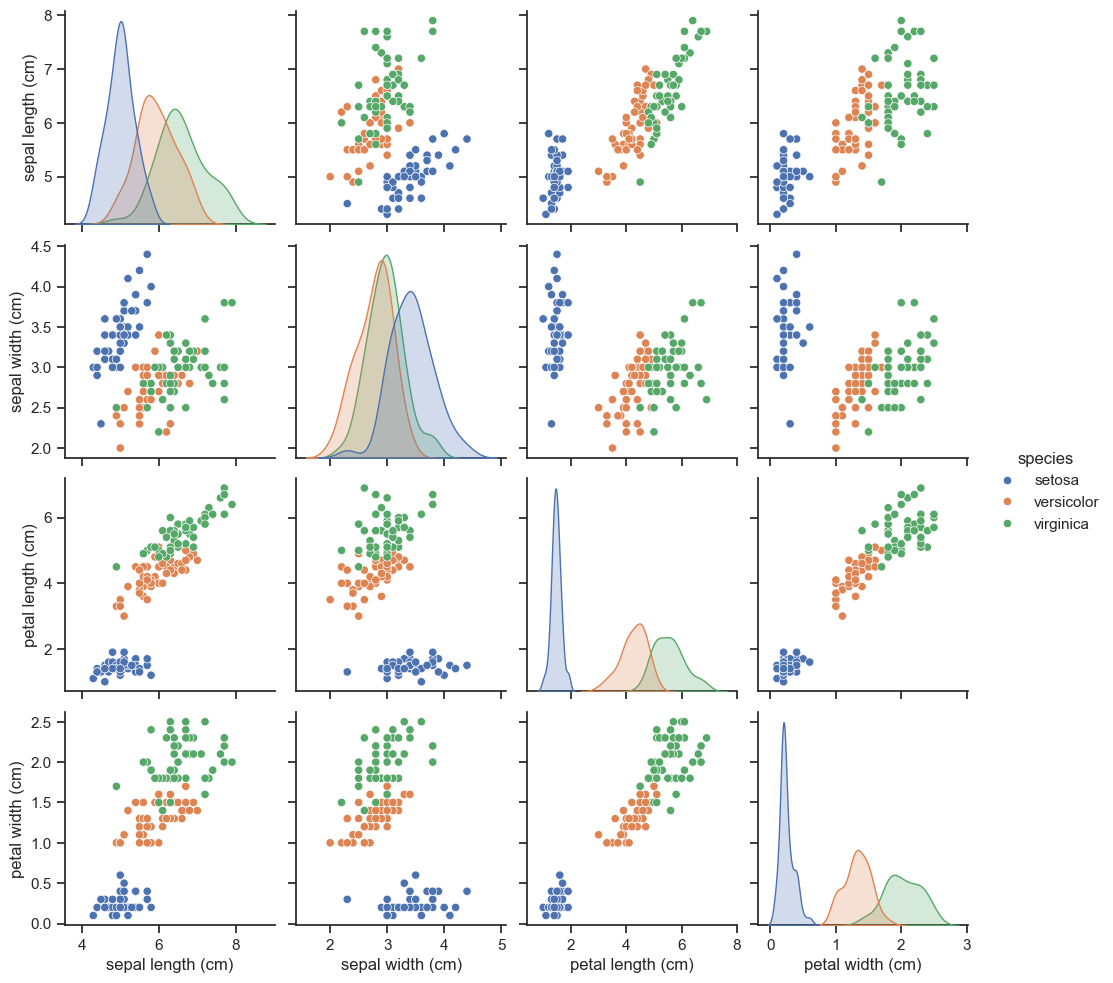

In [5]:
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import sklearn.datasets
import pandas as pd

iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
    columns=iris.feature_names + ['species']
)

cols = iris_df.columns.drop('species')
iris_df[cols] = iris_df[cols].apply(pd.to_numeric)
g = sns.pairplot(iris_df, hue='species')

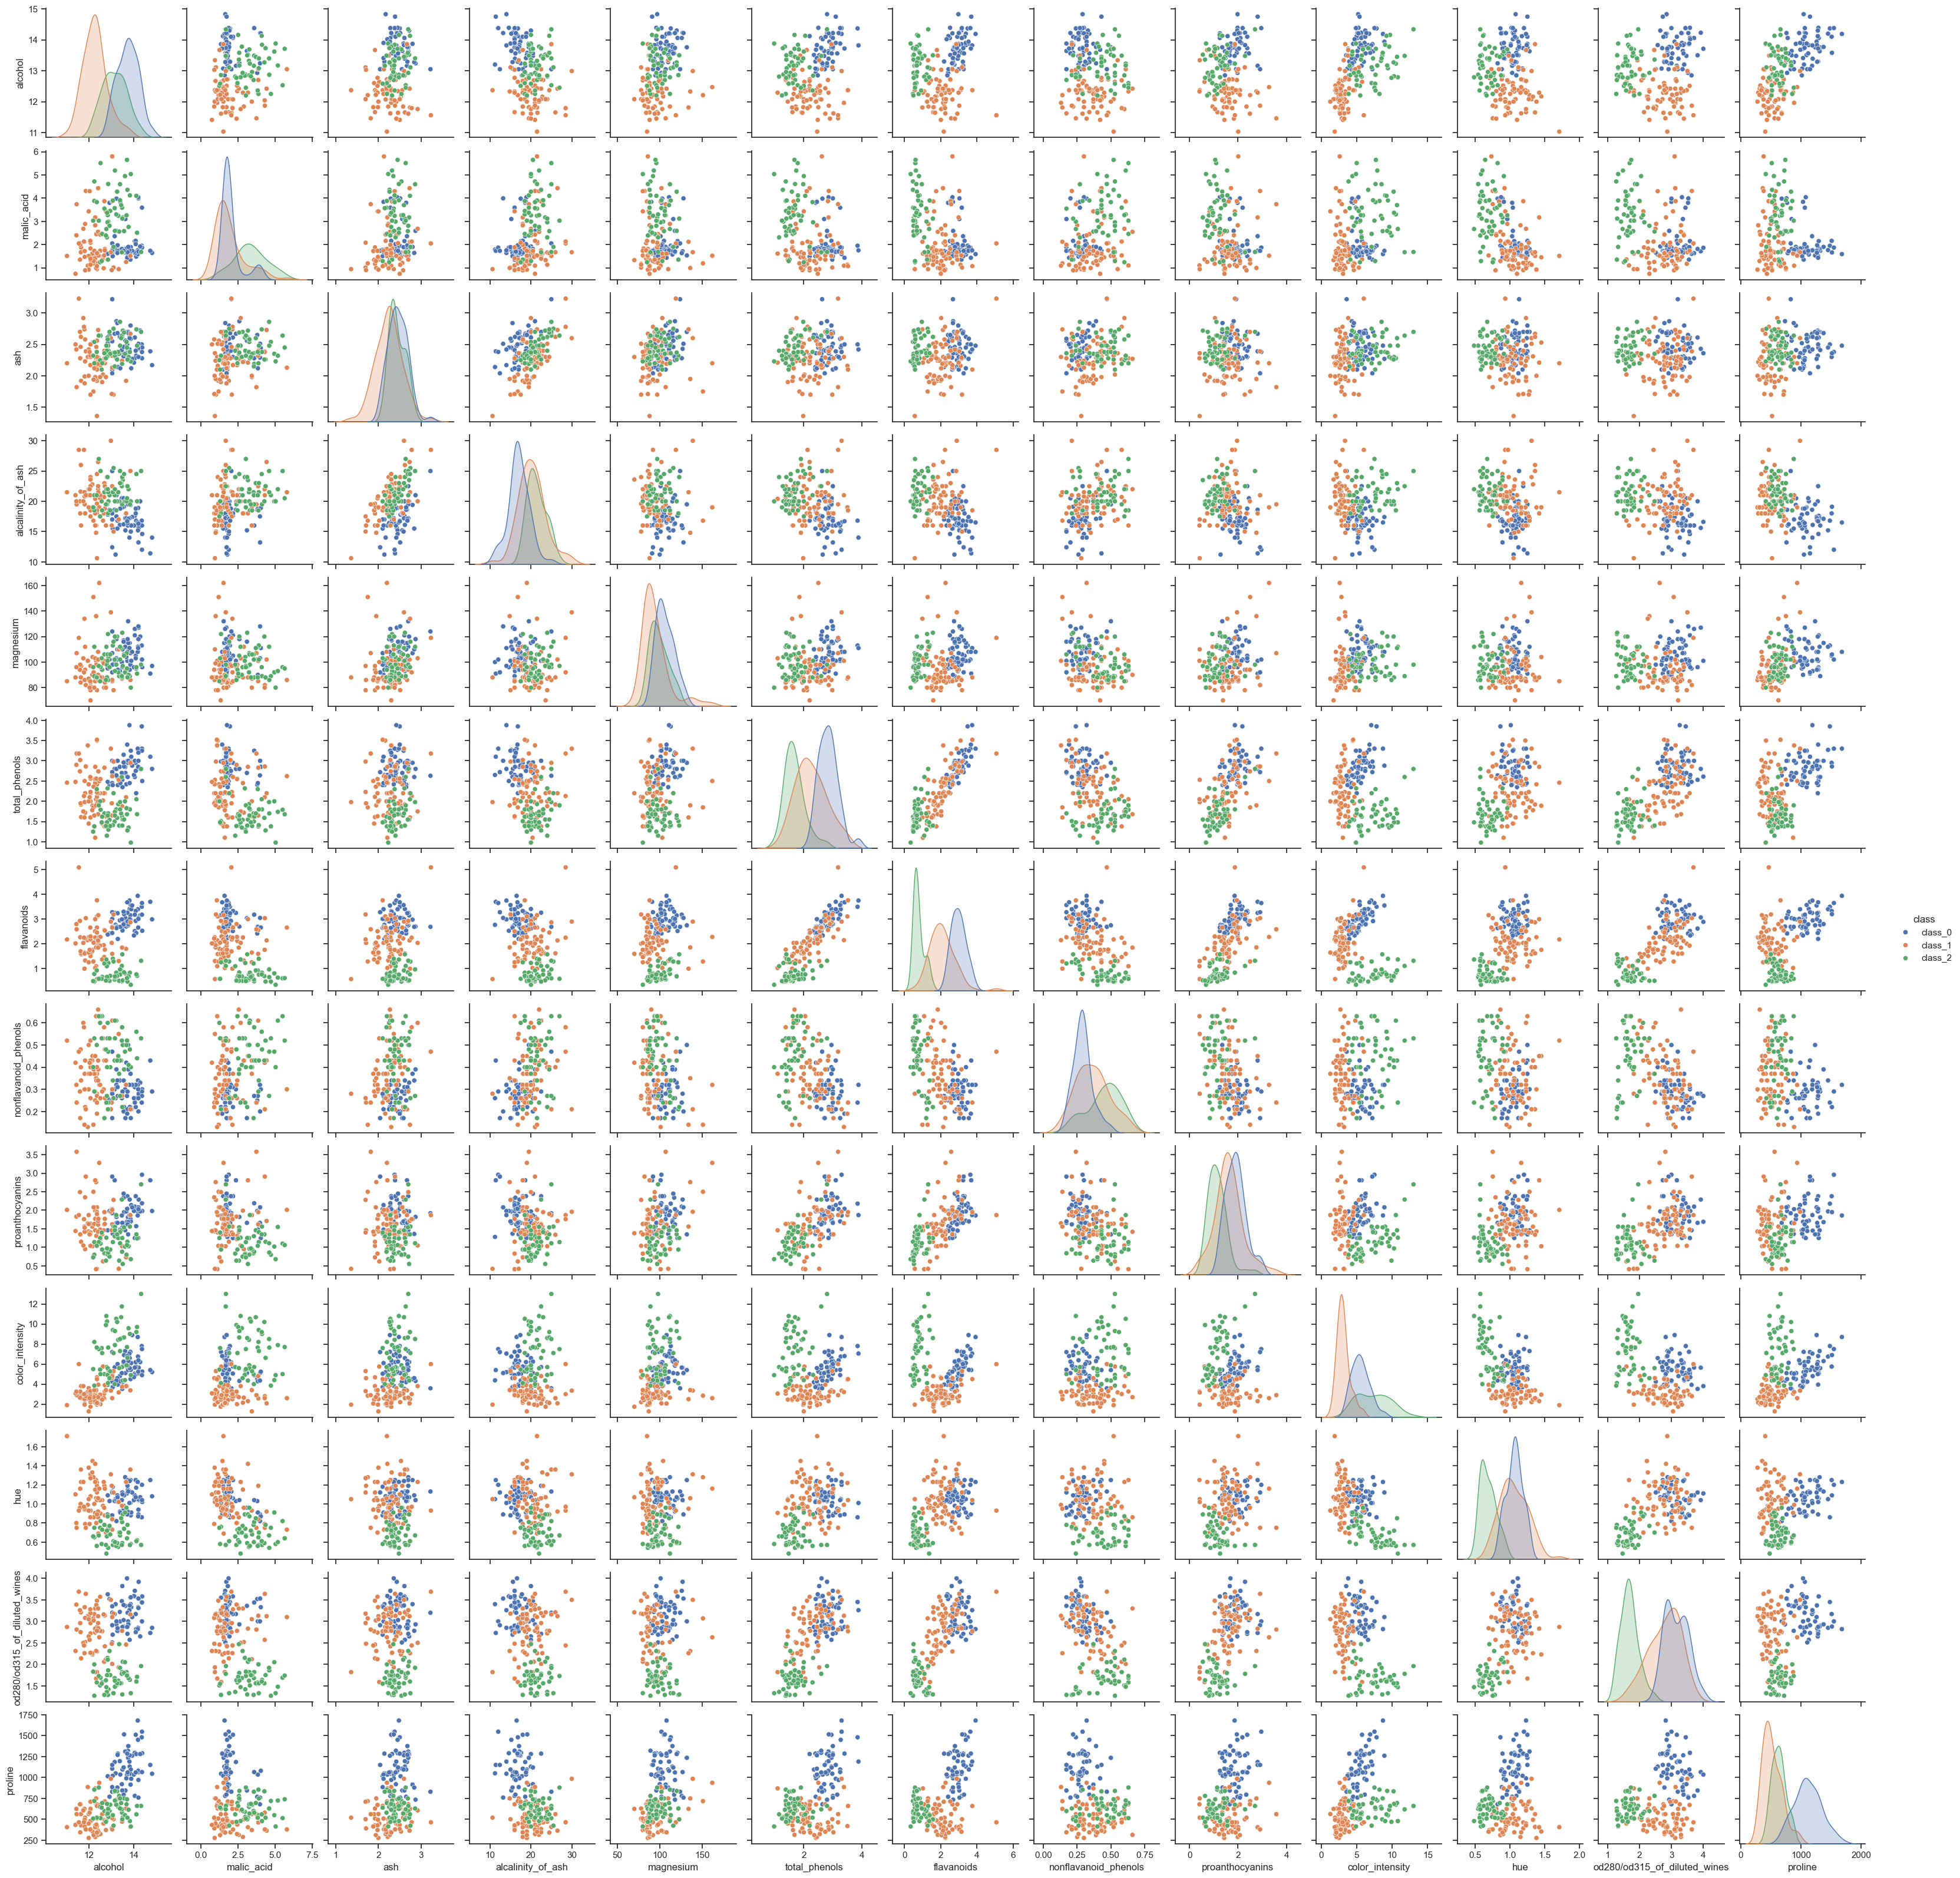

In [6]:
# plot features from wine dataset
wine_df = pd.DataFrame(
    data=np.c_[wine.data, [wine.target_names[v] for v in wine.target]],
    columns=wine.feature_names + ['class']
)

# plot features from wine dataset
cols = wine_df.columns.drop('class')
wine_df[cols] = wine_df[cols].apply(pd.to_numeric)
g = sns.pairplot(wine_df, hue='class')

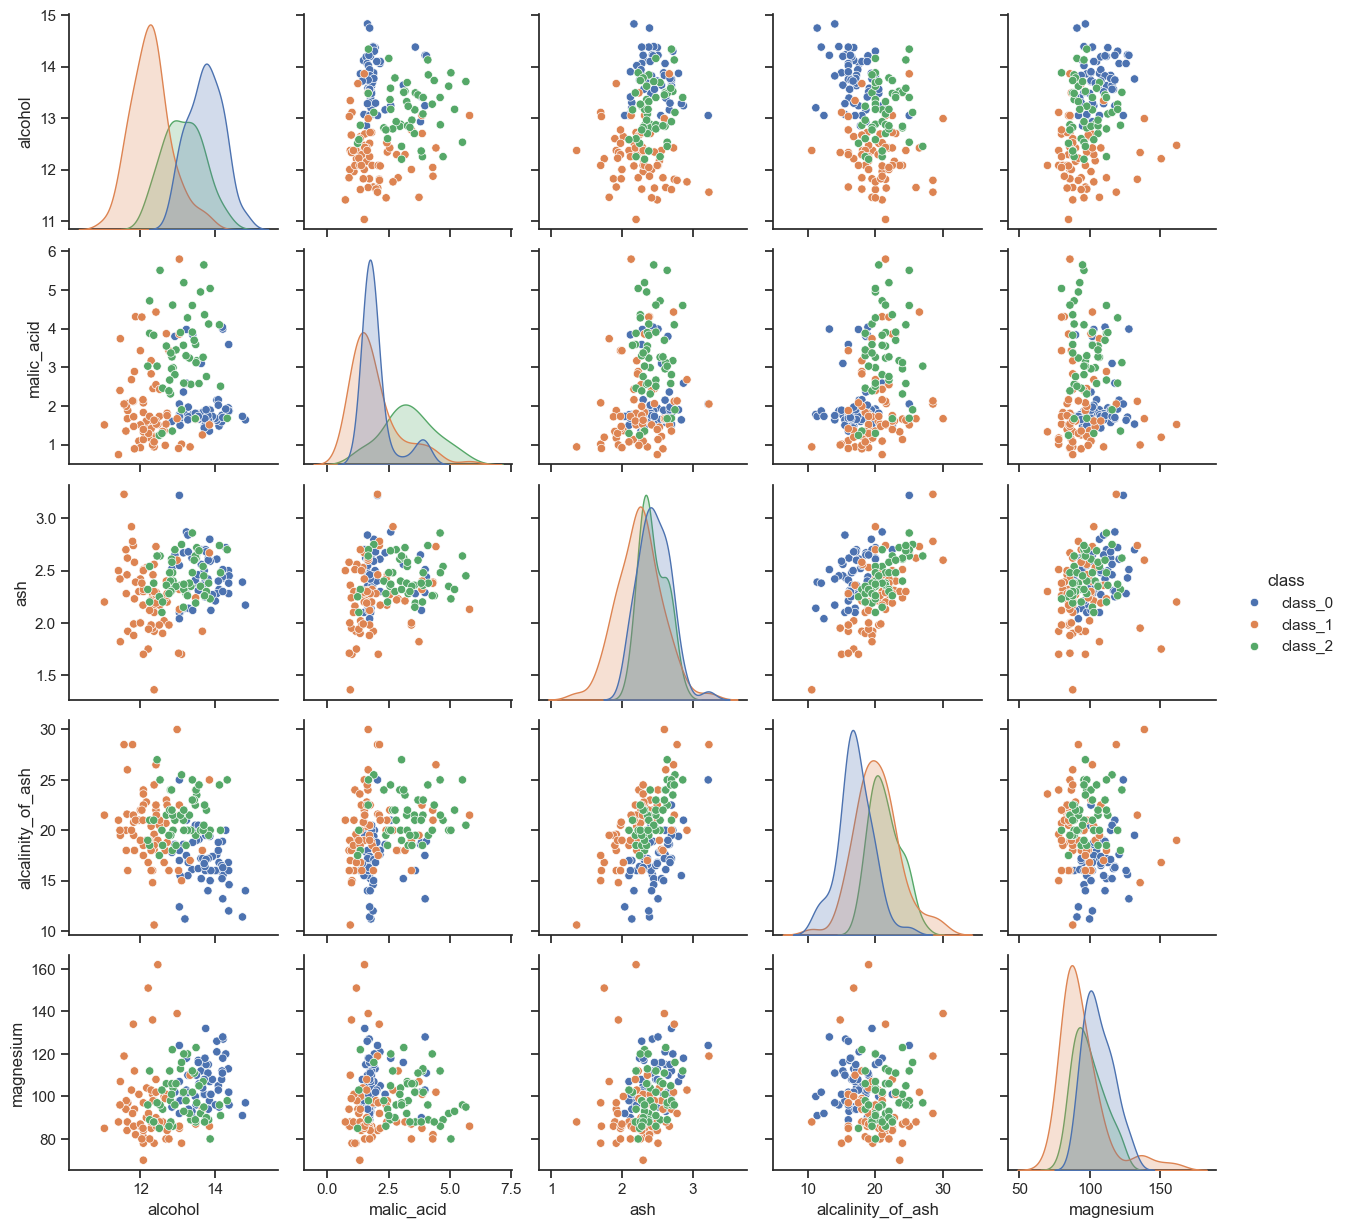

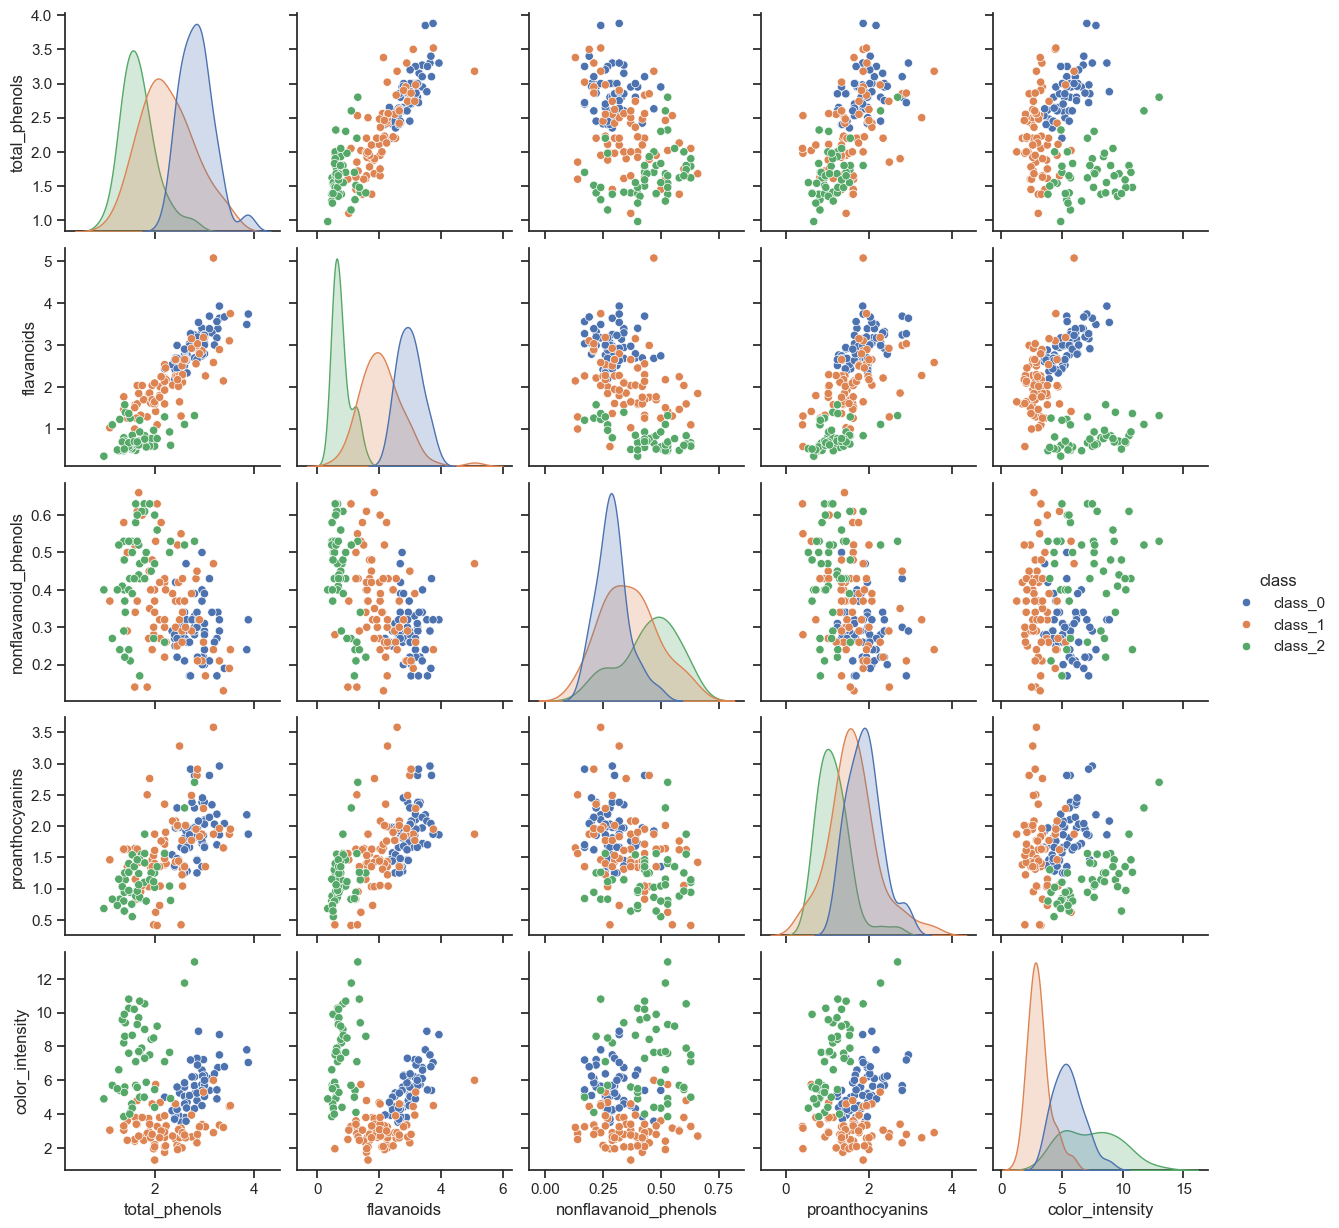

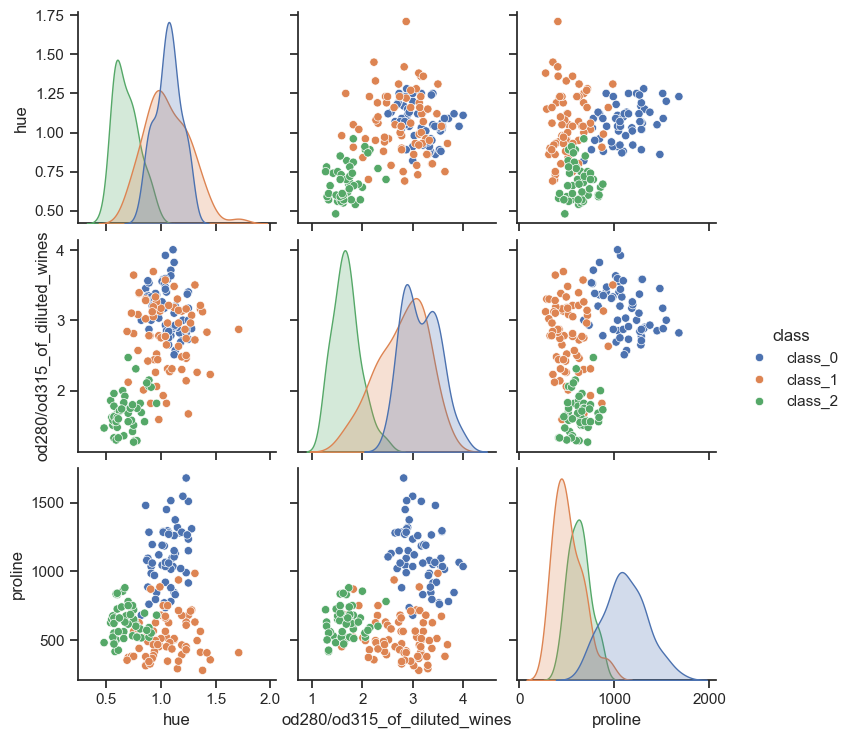

In [7]:
# before there are a ton of features, we can split it up so we can see the features better
# split up dataset into smaller batches be sure to include the class column

wine_df_5 = wine_df.iloc[:, :5]
wine_df_5['class'] = wine_df['class']
g = sns.pairplot(wine_df_5, hue="class")
# last 5 features
wine_df_5 = wine_df.iloc[:, 5:10]
wine_df_5['class'] = wine_df['class']
g = sns.pairplot(wine_df_5, hue="class")

wine_last_3 = wine_df.iloc[:, -4:]
wine_last_3['class'] = wine_df['class']
g = sns.pairplot(wine_last_3, hue="class")



## 5. \[20 pts] Unsupervised clustering on the Iris dataset

Based on the plots in **Question 4**, outline an approach to group the dataset into non-overlapping clusters:

i. Which features would you use?

- Since we have already take a look at which features have good separation power, I know that using petal length and width is going to give us the most distinct groupings.


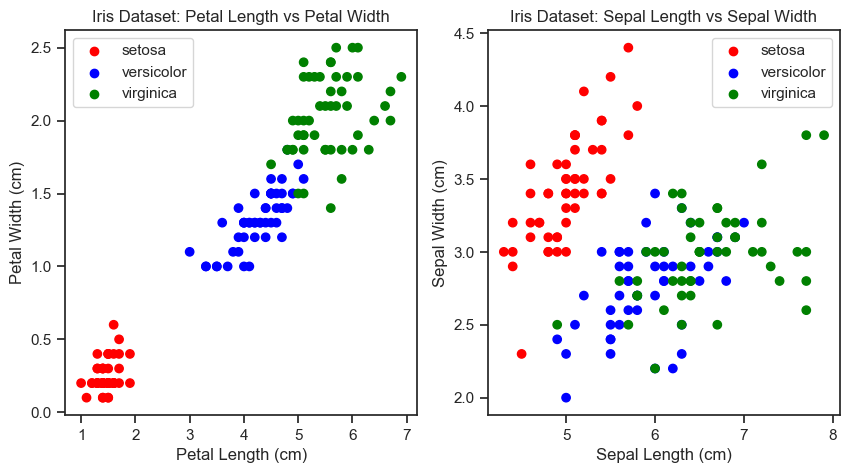

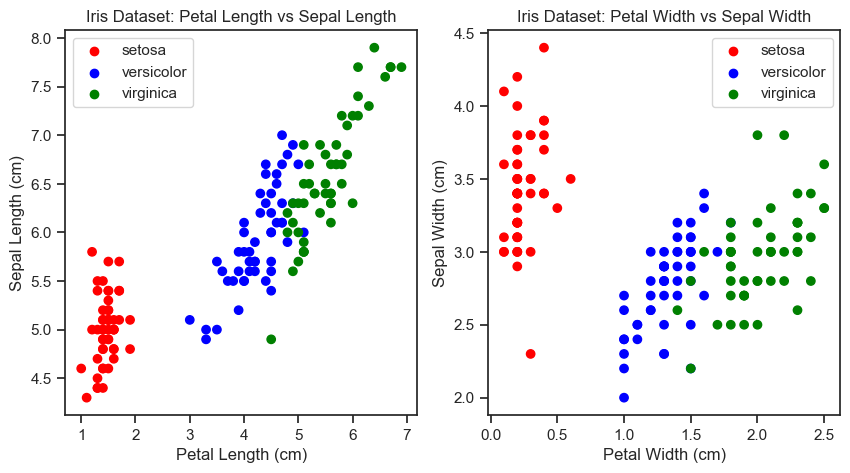

In [ ]:
import matplotlib.pyplot as plt

# create a color map to easily visualize the different species
color_map = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}
colors = [color_map[species] for species in iris_df['species']]

# scatter plot of petal length and width
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=colors)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset: Petal Length vs Petal Width')
plt.legend(handles=[plt.scatter([], [], c=color, label=species) for species, color in color_map.items()])

plt.subplot(1, 2, 2)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=colors)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Sepal Length vs Sepal Width')
plt.legend(handles=[plt.scatter([], [], c=color, label=species) for species, color in color_map.items()])

# Create a new figure for the third subplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(iris_df['petal length (cm)'], iris_df['sepal length (cm)'], c=colors)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Iris Dataset: Petal Length vs Sepal Length')
plt.legend(handles=[plt.scatter([], [], c=color, label=species) for species, color in color_map.items()])

plt.subplot(1, 2, 2)
plt.scatter(iris_df['petal width (cm)'], iris_df['sepal width (cm)'], c=colors)
plt.xlabel('Petal Width (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset: Petal Width vs Sepal Width')
plt.legend(handles=[plt.scatter([], [], c=color, label=species) for species, color in color_map.items()])

### K = 3 Clustering

sepal length (cm)             sepal width (cm)              \
                      min median  max              min median  max   
cluster                                                              
0                     4.9    5.9  7.0              2.0    2.8  3.4   
1                     4.3    5.0  5.8              2.3    3.4  4.4   
2                     6.1    6.7  7.9              2.5    3.0  3.8   

        petal length (cm)             petal width (cm)              
                      min median  max              min median  max  
cluster                                                             
0                     3.0   4.50  5.1              1.0    1.4  2.4  
1                     1.0   1.50  1.9              0.1    0.2  0.6  
2                     4.9   5.65  6.9              1.4    2.1  2.5

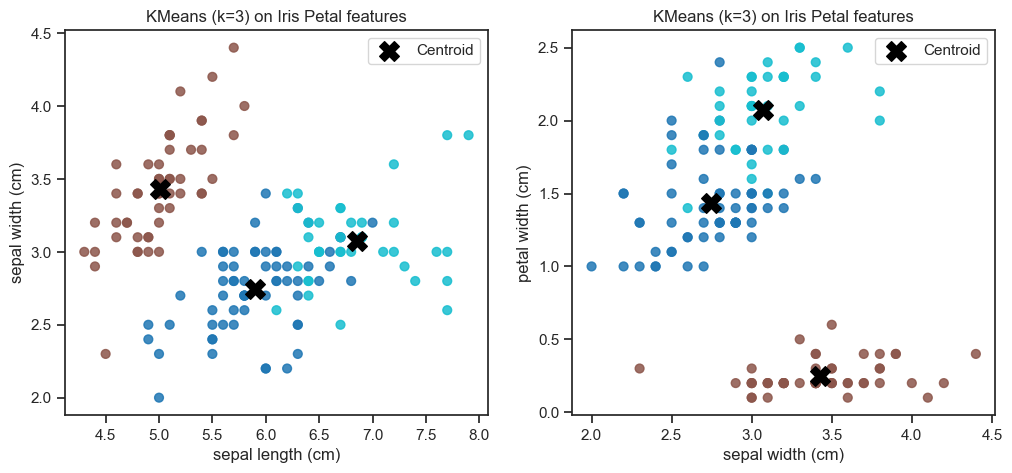

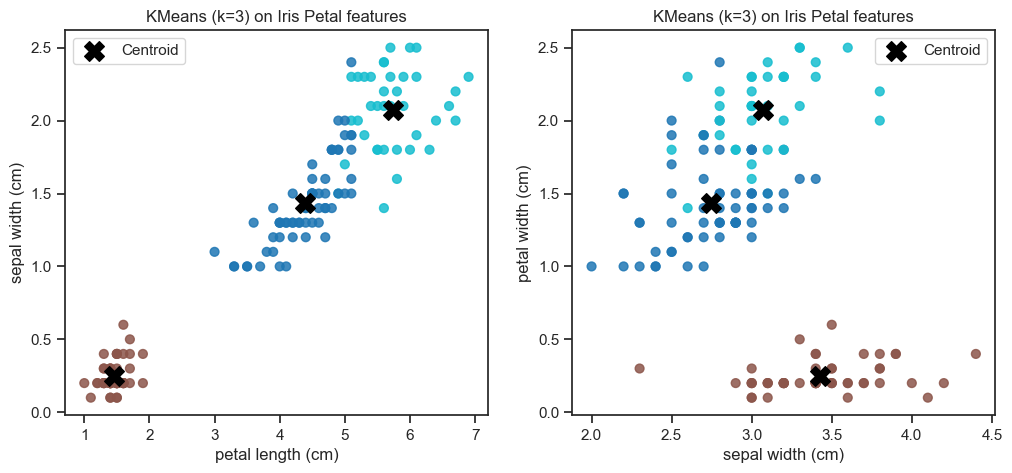

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# kmeans clustering for iris dataset
cluster_data = iris_df.drop('species', axis=1).values

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(cluster_data[:, 1], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[3])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(cluster_data[:, 2], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 2], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[1])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(cluster_data[:, 1], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[3])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')


# Display the summary of the clusters
summary = iris_df.drop(columns='species').copy()
summary['cluster'] = cluster_labels
display(summary.groupby('cluster').agg(['min', 'median', 'max']).round(2))


### K = 4 for clustering

sepal length (cm)             sepal width (cm)              \
                      min median  max              min median  max   
cluster                                                              
0                     5.6   6.25  7.0              2.2   2.90  3.4   
1                     4.3   5.00  5.8              2.3   3.40  4.4   
2                     4.9   5.60  6.1              2.0   2.65  3.0   
3                     6.2   6.80  7.9              2.5   3.05  3.8   

        petal length (cm)             petal width (cm)              
                      min median  max              min median  max  
cluster                                                             
0                     4.3   4.80  5.6              1.2   1.50  2.4  
1                     1.0   1.50  1.9              0.1   0.20  0.6  
2                     3.0   4.00  4.5              1.0   1.25  1.7  
3                     5.1   5.75  6.9              1.6   2.15  2.5

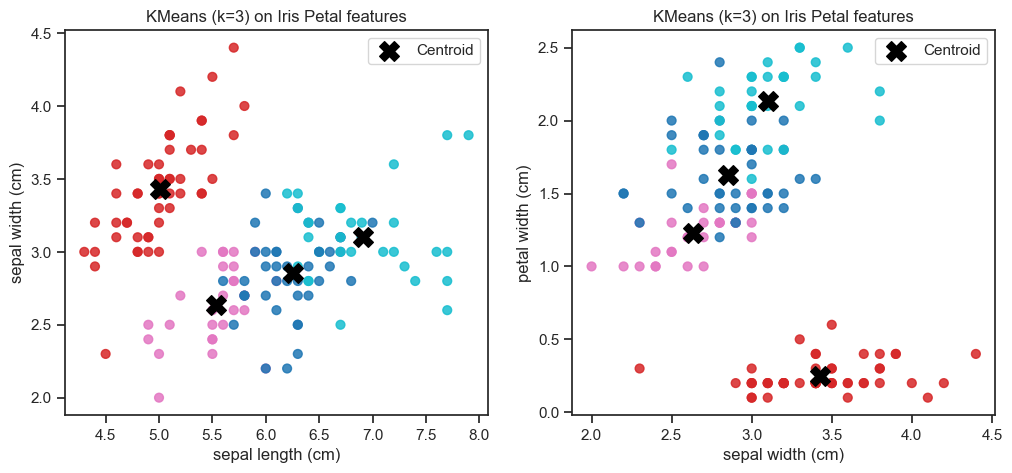

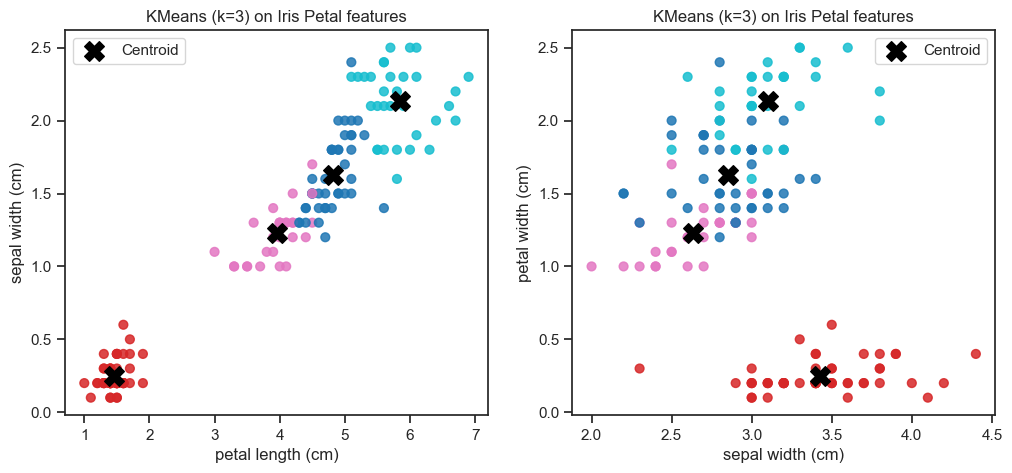

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

cluster_data = iris_df.drop('species', axis=1).values

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(cluster_data[:, 1], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[3])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(cluster_data[:, 2], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 2], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[1])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.scatter(cluster_data[:, 1], cluster_data[:, 3], c=cluster_labels, cmap=plt.cm.tab10, s=40, alpha=0.85)
plt.scatter(centroids[:, 1], centroids[:, 3], c='black', marker='X', s=200, label='Centroid')
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[3])
plt.title('KMeans (k=3) on Iris Petal features')
plt.legend(loc='best')


summary = iris_df.drop(columns='species').copy()
summary['cluster'] = cluster_labels
display(summary.groupby('cluster').agg(['min', 'median', 'max']).round(2))



ii. Are three clusters obvious from the plots?
- The clusters are most obvious when we plot by petal length vs sepal length and petal width vs sepal width

iii. What about four clusters?

- Using 3 clusters matches the number of Iris species and produces clusters that correspond well to the labels. When using 4 clusters, k-means begins splitting the overlapping Versicolor/Virginica region into two groups. This doesn’t align with the biological classes but highlights substructure within the data. So, k=3 provides a more meaningful clustering, while k=4 shows us some finer distinctions that may or may not be useful depending on the application.

* Either mark them manually (cutoff thresholds) on a few plots if possible, or specify their ranges per cluster per feature.
  iv. For this problem, is there any relation between classification and clustering since the labels are already given?

  - Yes, there is a relation between classification and clustering in this problem. Classification is supervised and relies on the given labels, while clustering is unsupervised and attempts to find structure without labels. Since the Iris dataset already has species labels, clustering is not necessary for prediction. However, clustering can still be valuable as an exploratory tool. It allows us to check whether the natural groupings in the data align with the known species. For example, clustering separates setosa distinctly, while versicolor and virginica show more overlap. This shows that the features provide strong, but not perfect—separation, and it highlights how clustering can aid classification by validating or revealing structure in labeled data.



## 6. \[20 pts] Classification with Naive Bayes and Decision Trees

Using the scikit-learn class descriptions, classify the Iris dataset from **Question 4**.

* Split into training and testing sets using `sklearn.model_selection.train_test_split` (make sure `shuffle=True`).

Answer the following:

i. Why is using shuffle important for this dataset?
- The Iris data is stored in class order, so if you split without shuffling, you risk training on one set of classes and testing on others, or creating highly imbalanced splits—especially at small training sizes.

ii. Which classifier has the higher performance?
- Across most splits, Naive Bayes achieves slightly higher accuracy than the Decision Tree, particularly at moderate train-test split sizes(20–80% training data). At more extreme splits with very little training data (90–95% test), the Decision Tree tends to hold up better while Naive Bayes degrades more sharply, and at the extreme of 99% test both models collapse to guessing levels of accuracy. Overall, Naive Bayes is the stronger performer under typical training conditions by a small margin.

iii. Does more training help?
- Yes! both models improve as the training fraction increases from 1% to around 50–80%. Gains are largest at very small training sizes and diminish thereafter.

* Test this by increasing training dataset size (e.g., 1% training with 99% testing, then 5%, 10%, etc.).
  iv. Will the performance plateau? Show it on a plot.
  - Performance is relatively stable until the 0.8 train-test-split point and then we see a sharp drop off in model performance.

### Hints

* Use the same subset of data for both Naive Bayes and Decision Tree classifiers.
* Collect statistics (mean, std. dev.) by repeating train-test with different samples (e.g., 10 times).
* Plot performance points with mean and std. dev. instead of a single number for stronger evidence.

🔗 References:

* [Naive Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [Decision Trees](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)

---


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_models(dataset, train_test_split_ratio = 0.2, shuffle = True):
    # 10 random states so we can get a better estimate of the accuracy
    random_states = np.random.randint(0, 1000, 10)

    naive_bayes_model_accuracies = []
    decision_tree_model_accuracies = []

    for random_state in random_states:
        # Single split reused by both models
        X_train, X_test, y_train, y_test = train_test_split(
            dataset.data, dataset.target,
            test_size=train_test_split_ratio,
            shuffle=shuffle,
            random_state=random_state
        )

        decision_tree_clf, decision_tree_accuracy = create_decision_tree_classifier(
            random_state=random_state,
            X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test
        )
        decision_tree_model_accuracies.append(decision_tree_accuracy)

        naive_bayes_clf, naive_bayes_accuracy = create_naive_bayes_classifier(
            random_state=random_state,
            X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test
        )
        naive_bayes_model_accuracies.append(naive_bayes_accuracy)

    # return the mean and standard deviation of the accuracies
    return {
        'decision_tree_accuracy': {
            'mean': np.mean(decision_tree_model_accuracies),
            'std': np.std(decision_tree_model_accuracies)
        },
        'naive_bayes_accuracy': {
            'mean': np.mean(naive_bayes_model_accuracies),
            'std': np.std(naive_bayes_model_accuracies)
        }
    }



def create_decision_tree_classifier(random_state = 42, X_train=None, X_test=None, y_train=None, y_test=None):

    # Create a decision tree classifier
    clf = DecisionTreeClassifier(random_state=random_state)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return clf, accuracy



def create_naive_bayes_classifier(random_state = 42, X_train=None, X_test=None, y_train=None, y_test=None):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return clf, accuracy


In [ ]:
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(
    data=np.c_[iris.data, [iris.target_names[v] for v in iris.target]],
    columns=iris.feature_names + ['species']
)

hyperparameters = [{
    'train_test_split_ratio': 0.2,
    'shuffle': True,
}, {
    'train_test_split_ratio': 0.5,
    'shuffle': True,
},
{
    'train_test_split_ratio': 0.8,
    'shuffle': True,
},
{
    'train_test_split_ratio': 0.9,
    'shuffle': True,
},
{
    'train_test_split_ratio': 0.95,
    'shuffle': True,
},
{
    'train_test_split_ratio': 0.99,
    'shuffle': True,
}]

# create an array where each element is a dictionary of the model stats and the hyperparameters so we easily see the stats for each hyperparameter 
model_stats = []
for hp in hyperparameters:
    model_stats.append({**train_models(iris, **hp), **hp})


In [13]:

for model_stat in model_stats:
    print(f"Train Test Split Ratio: {model_stat['train_test_split_ratio']}")
    print(f"Decision Tree Accuracy: {model_stat['decision_tree_accuracy']['mean']} ± {model_stat['decision_tree_accuracy']['std']}")
    print(f"Naive Bayes Accuracy: {model_stat['naive_bayes_accuracy']['mean']} ± {model_stat['naive_bayes_accuracy']['std']}")
    print("\n")



Train Test Split Ratio: 0.2
Decision Tree Accuracy: 0.9633333333333335 ± 0.03785938897200181
Naive Bayes Accuracy: 0.9600000000000002 ± 0.04163331998932264


Train Test Split Ratio: 0.5
Decision Tree Accuracy: 0.9413333333333334 ± 0.024729649321321875
Naive Bayes Accuracy: 0.9560000000000001 ± 0.010413666234542223


Train Test Split Ratio: 0.8
Decision Tree Accuracy: 0.9399999999999998 ± 0.022298480267099425
Naive Bayes Accuracy: 0.9349999999999999 ± 0.01166666666666666


Train Test Split Ratio: 0.9
Decision Tree Accuracy: 0.9022222222222223 ± 0.07278885034985628
Naive Bayes Accuracy: 0.825925925925926 ± 0.13663604996812384


Train Test Split Ratio: 0.95
Decision Tree Accuracy: 0.7643356643356642 ± 0.16581096451928148
Naive Bayes Accuracy: 0.5804195804195805 ± 0.17696591427006025


Train Test Split Ratio: 0.99
Decision Tree Accuracy: 0.3288590604026846 ± 0.0
Naive Bayes Accuracy: 0.3288590604026846 ± 0.0




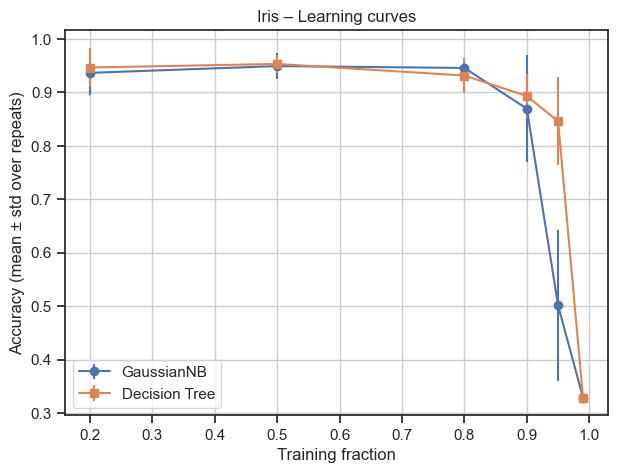

In [15]:
import matplotlib.pyplot as plt

ts = [r["train_test_split_ratio"] for r in model_stats]
nb_mean = [r["naive_bayes_accuracy"]["mean"] for r in model_stats]; nb_std = [r["naive_bayes_accuracy"]["std"] for r in model_stats]
dt_mean = [r["decision_tree_accuracy"]["mean"] for r in model_stats]; dt_std = [r["decision_tree_accuracy"]["std"] for r in model_stats]

plt.figure(figsize=(7,5))
plt.errorbar(ts, nb_mean, yerr=nb_std, marker='o', label='GaussianNB')
plt.errorbar(ts, dt_mean, yerr=dt_std, marker='s', label='Decision Tree')
plt.xlabel('Training fraction')
plt.ylabel('Accuracy (mean ± std over repeats)')
plt.title('Iris – Learning curves')
plt.grid(True); plt.legend(); plt.show()
